# TRABAJO DE ML
---
## Integrantes
*   Erick Rosado - 2019214082
*   Marcel Diazgranados - 2018214090
*   Kevin Castañeda -
*   Daider Ebratt - 

---

# 1. Descripción del Problema y del Conjunto de Datos

Descripción del Problema de Regresión:
El problema se centra en predecir la concentración de monóxido de carbono (CO) en el aire utilizando datos recopilados por una serie de sensores químicos. Se trata de un problema de regresión donde la variable objetivo es la concentración promediada por hora de CO en mg/m^3. El objetivo es desarrollar un modelo que pueda estimar con precisión la concentración de CO en función de las lecturas de los sensores y otras variables ambientales.

Descripción de las Variables:
El conjunto de datos contiene múltiples variables que pueden utilizarse para predecir la concentración de CO. Estas variables incluyen:

- Fecha y Hora: Las variables de fecha y hora indican cuándo se tomaron las lecturas de los sensores.
- Concentraciones de Sustancias Químicas: El conjunto de datos incluye concentraciones promediadas por hora de diversas sustancias químicas, como CO, hidrocarburos no metánicos, benceno, óxidos de nitrógeno (NOx), dióxido de nitrógeno (NO2), entre otras.
- Respuestas del Sensor: También se incluyen las respuestas promediadas por hora de los sensores químicos, como PT08.S1 (óxido de estaño), PT08.S2 (titania), PT08.S3 (óxido de tungsteno), PT08.S4 (óxido de tungsteno), y PT08.S5 (óxido de indio). Estas respuestas del sensor pueden estar relacionadas con las concentraciones de las sustancias químicas mencionadas anteriormente.
- Variables Ambientales: Además de las concentraciones de sustancias químicas, el conjunto de datos contiene variables ambientales como temperatura y humedad relativa.

Estas variables proporcionan información valiosa que puede utilizarse para desarrollar un modelo de regresión capaz de predecir la concentración de CO en el aire.

---

# Liberias a utilizar

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# 2. Descripción de las Herramientas de Visualización y Funciones Utilizadas:
* Matplotlib y Seaborn: Se utilizan estas bibliotecas de visualización para crear gráficos como histogramas y mapas de calor. Matplotlib proporciona una interfaz para crear gráficos estáticos y Seaborn ofrece una interfaz más fácil de usar y produce gráficos más atractivos visualmente.

* sns.histplot(): Esta función de Seaborn se utiliza para crear histogramas de las variables del conjunto de datos. Los histogramas muestran la distribución de las variables numéricas, lo que ayuda a comprender mejor su dispersión y características.

* sns.heatmap(): Se utiliza esta función de Seaborn para crear mapas de calor de la matriz de correlación del conjunto de datos. Los mapas de calor son útiles para visualizar la relación entre las diferentes variables del conjunto de datos, resaltando las correlaciones positivas y negativas entre ellas.

* pd.describe(): Se utiliza este método de Pandas para obtener estadísticas descriptivas del conjunto de datos, como la media, la mediana, la desviación estándar, el mínimo y el máximo de las variables numéricas. Estas estadísticas ayudan a comprender la distribución y la variabilidad de los datos.

Estas herramientas y funciones son fundamentales para explorar y comprender los datos antes de construir y entrenar modelos de aprendizaje automático.

In [5]:
# Cargar el archivo Excel en un DataFrame de Pandas
df = pd.read_excel("AirQualityUCI.xlsx")

# Función para convertir los valores de la columna 'Date' a valores numéricos secuenciales
def convert_date_to_numeric(df):
    # Convertir 'Date' a tipo datetime
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
    # Asignar un valor numérico secuencial a cada fecha
    df['Date'] = (df['Date'] - df['Date'].min()).dt.days
    return df

# Aplicar la función para convertir la columna 'Date' a valores numéricos
df = convert_date_to_numeric(df)
#----------------------------------------------------------------------------------------------------------------
# Función para extraer solo la hora de la columna 'Time'
def extract_hour(df):
    # Convertir 'Time' a tipo datetime
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
    # Extraer la hora de 'Time'
    df['Time'] = df['Time'].dt.hour
    return df

# Aplicar la función para extraer solo la hora de la columna 'Time'
df = extract_hour(df)

#----------------------------------------------------------------------------------------------------------------

# Mostrar las primeras filas del DataFrame
print(df.head())

   Date  Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  \
0     0    18     2.6      1360.00       150  11.881723        1045.50   
1     0    19     2.0      1292.25       112   9.397165         954.75   
2     0    20     2.2      1402.00        88   8.997817         939.25   
3     0    21     2.2      1375.50        80   9.228796         948.25   
4     0    22     1.6      1272.25        51   6.518224         835.50   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)      T  \
0    166.0       1056.25    113.0       1692.00      1267.50  13.60   
1    103.0       1173.75     92.0       1558.75       972.25  13.30   
2    131.0       1140.00    114.0       1554.50      1074.00  11.90   
3    172.0       1092.00    122.0       1583.75      1203.25  11.00   
4    131.0       1205.00    116.0       1490.00      1110.00  11.15   

          RH        AH  
0  48.875001  0.757754  
1  47.700000  0.725487  
2  53.975000  0.750239  
3  60.000000  0.786713  
4  

# 3. Estrategias implementadas para preparación de los datos:
Para preparar nuestros datos antes de entrenar nuestros modelos, implementamos algunas estrategias clave. Primero, convertimos nuestras variables de fecha y hora a formatos adecuados para facilitar su manejo. Luego, utilizamos un algoritmo llamado KNNImputer para rellenar los valores faltantes en nuestros datos. Básicamente, este algoritmo mira a las observaciones vecinas más cercanas y utiliza sus valores para llenar los vacíos.

También eliminamos algunas variables que no son tan relevantes para predecir la concentración de CO o que están muy correlacionadas entre sí. Esto ayuda a simplificar nuestro modelo y a evitar problemas de multicolinealidad. Y por último, pero no menos importante, normalizamos nuestros datos utilizando el MinMaxScaler. Esto es importante para asegurarnos de que todas nuestras variables estén en la misma escala, lo que facilita el proceso de optimización de nuestros modelos.

En resumen, estas estrategias nos ayudan a asegurarnos de que nuestros datos estén en la mejor forma posible antes de alimentarlos a nuestros modelos de aprendizaje automático.

In [6]:
# Utilizar el método info() para obtener información sobre el DataFrame
print("Información del DataFrame:")
print(df.info())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   int64  
 1   Time           9357 non-null   int32  
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(12), int32(1), int64(2)
memory usage: 1.0 MB
None


In [7]:
#Para observar si hay datos nulos en el dataset
df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [8]:
# Contar los valores de -200 en cada columna
null_values_count = (df == -200).sum()

# Mostrar el conteo de valores de -200 por columna
print("Conteo de valores -200 (considerados nulos) por columna:")
print(null_values_count)

Conteo de valores -200 (considerados nulos) por columna:
Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


In [9]:
# Utilizar el método describe() para obtener estadísticas descriptivas del DataFrame
print("\nDescripción del DataFrame:")
print(df.describe())


Descripción del DataFrame:
             Date         Time       CO(GT)  PT08.S1(CO)     NMHC(GT)  \
count  9357.00000  9357.000000  9357.000000  9357.000000  9357.000000   
mean    195.18756    11.498557   -34.207524  1048.869652  -159.090093   
std     112.55380     6.923182    77.657170   329.817015   139.789093   
min       0.00000     0.000000  -200.000000  -200.000000  -200.000000   
25%      98.00000     5.000000     0.600000   921.000000  -200.000000   
50%     195.00000    11.000000     1.500000  1052.500000  -200.000000   
75%     293.00000    18.000000     2.600000  1221.250000  -200.000000   
max     390.00000    23.000000    11.900000  2039.750000  1189.000000   

          C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)      NO2(GT)  \
count  9357.000000    9357.000000  9357.000000   9357.000000  9357.000000   
mean      1.865576     894.475963   168.604200    794.872333    58.135898   
std      41.380154     342.315902   257.424561    321.977031   126.931428   
min   

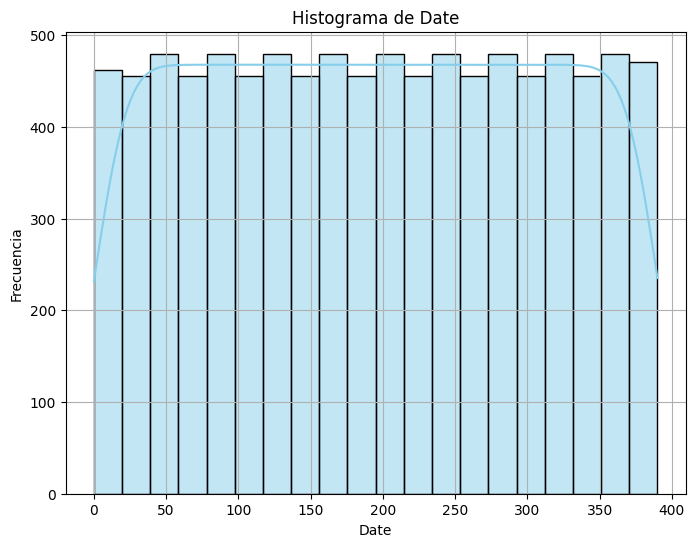

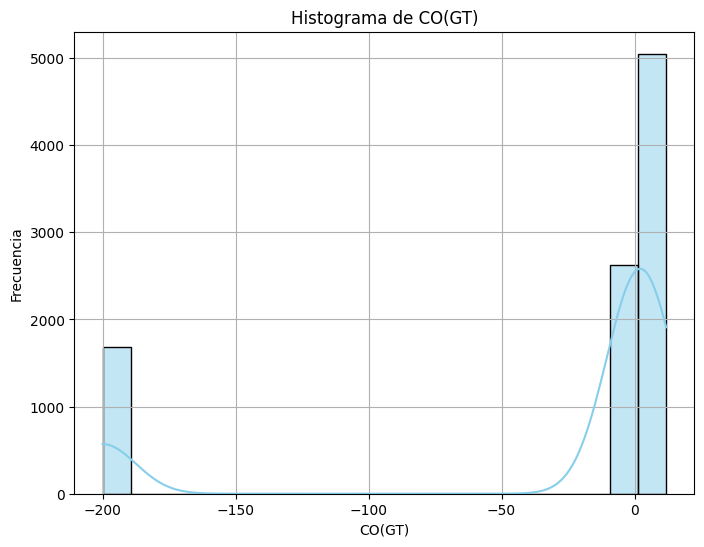

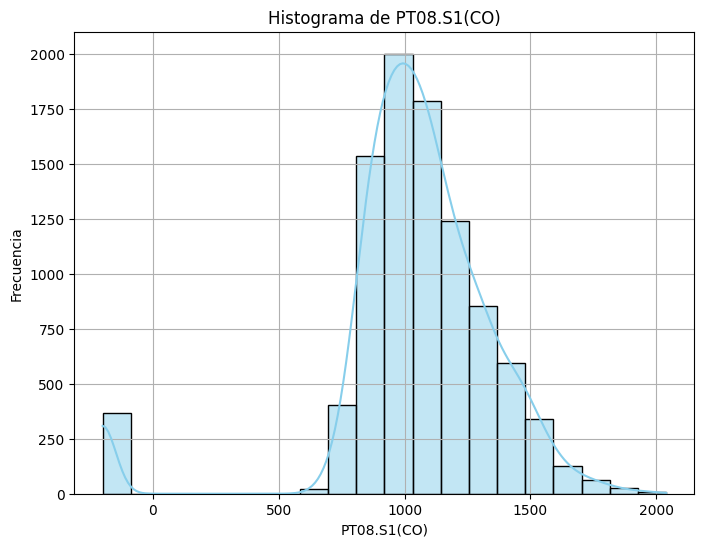

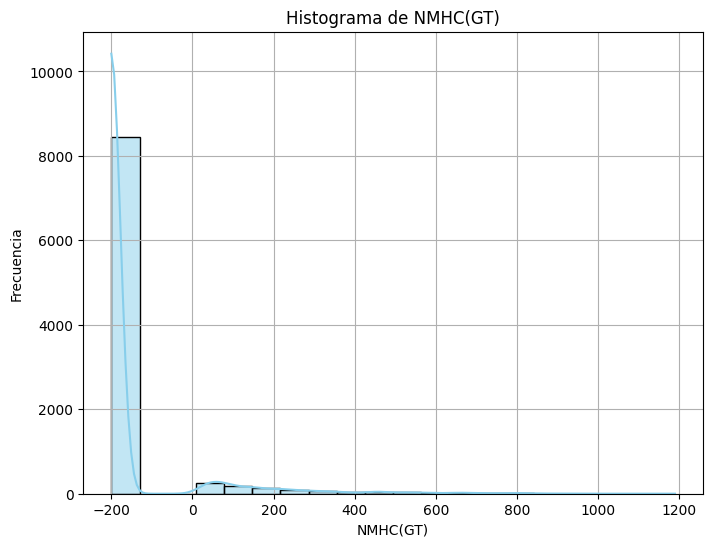

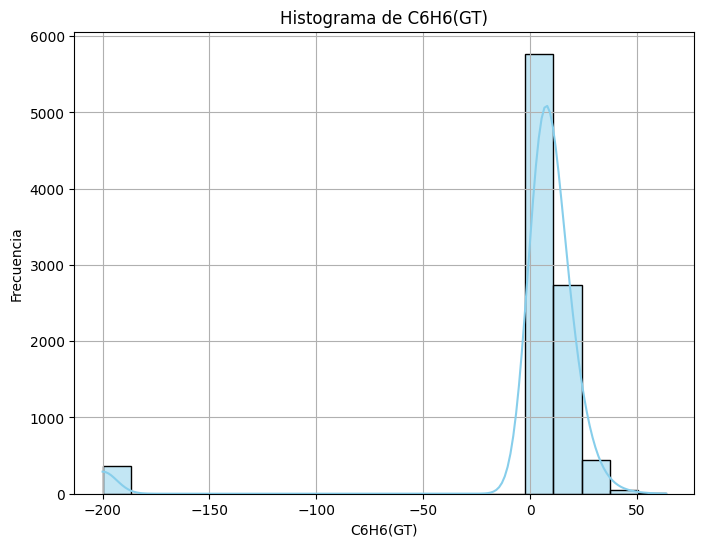

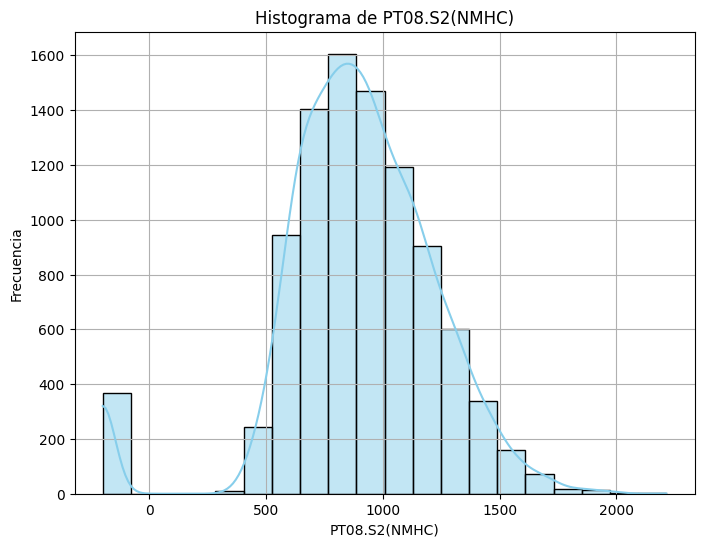

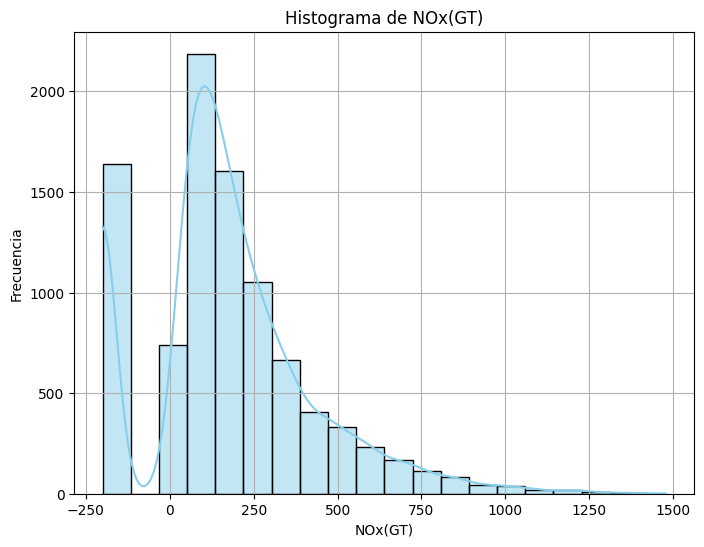

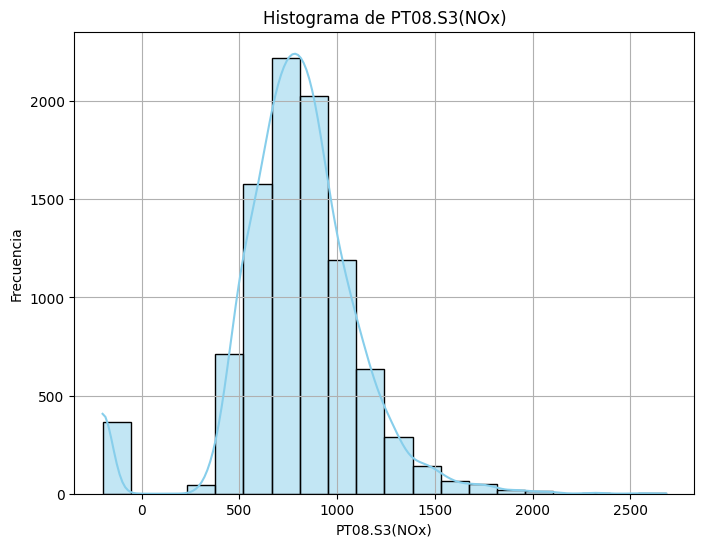

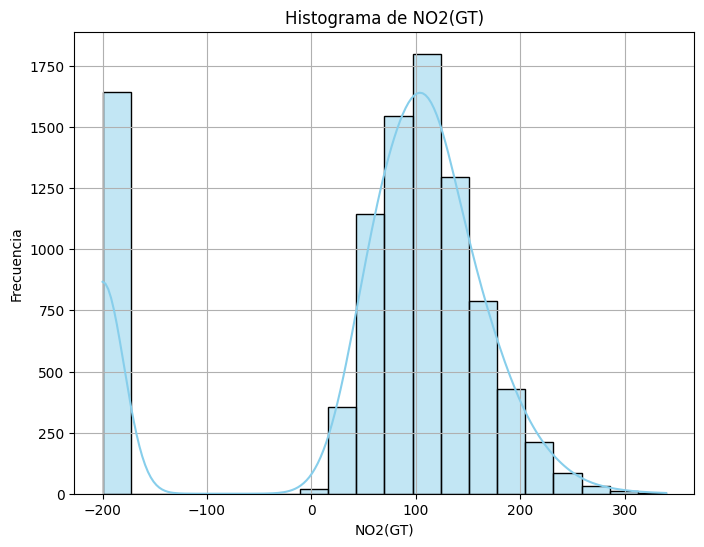

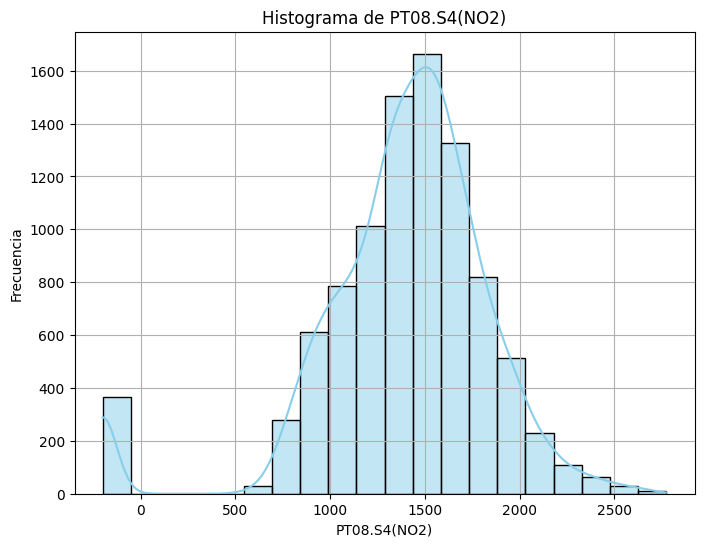

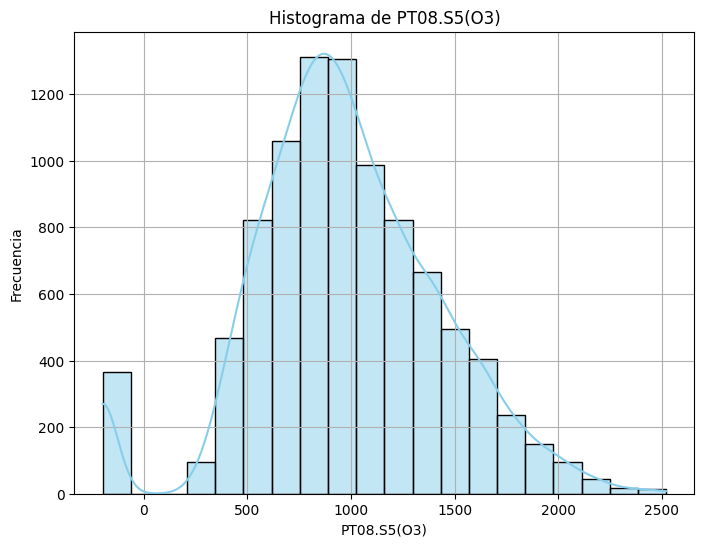

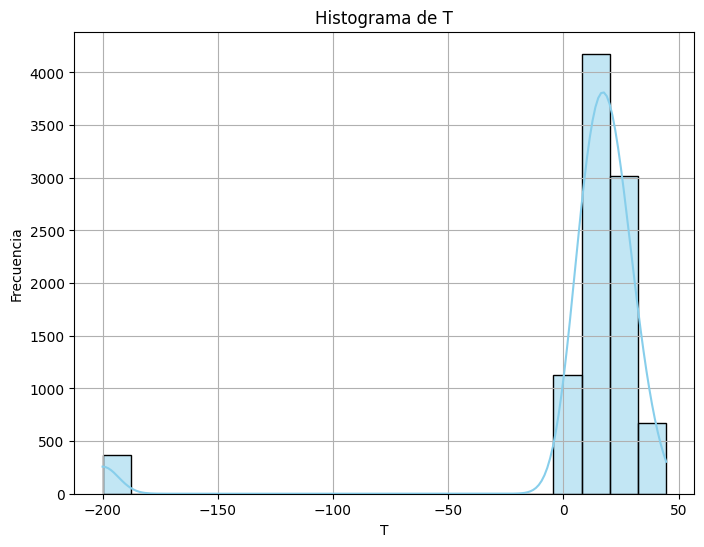

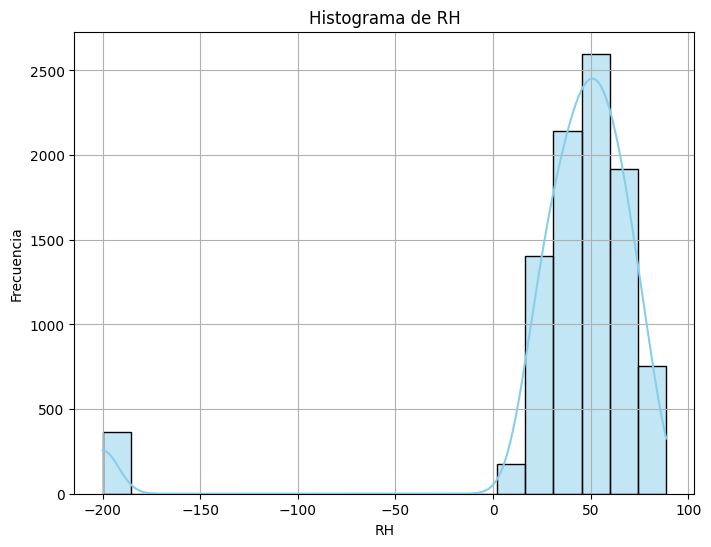

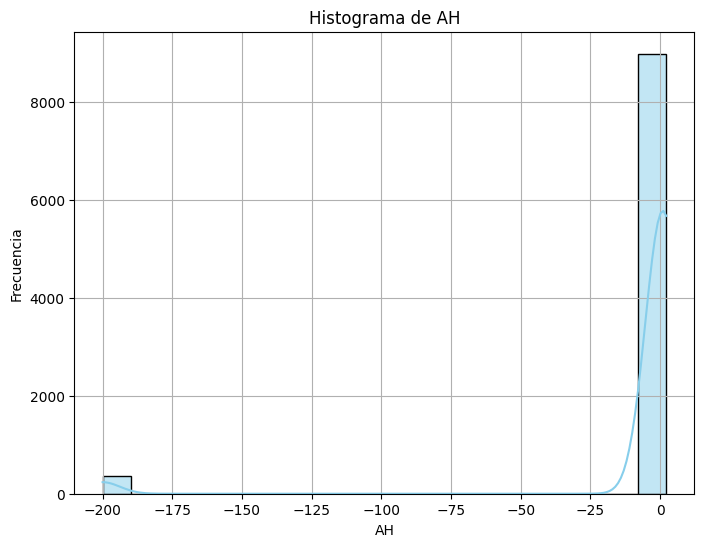

In [10]:
# Seleccionar las columnas para el histograma
columns_for_histogram = df.columns[df.columns != 'Time']

# Crear histogramas para todas las columnas excepto 'Time'
for column in columns_for_histogram:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=20, kde=True, color='skyblue')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()



In [11]:
# Despues de haber analizado todos los datos podemos concluir que la variable NMCH contiene muchos valores de -200 (8443),
# por lo que se procede a eliminar y para el resto de las columnas reemplazamos el valor que tienen de -200 por NaN.

In [12]:
# Eliminar la columna "NMHC"
df = df.drop(columns=['NMHC(GT)'])

# Mostrar las primeras filas del DataFrame para verificar que la columna ha sido eliminada
print(df.head(10))


   Date  Time  CO(GT)  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     0    18     2.6      1360.00  11.881723        1045.50    166.0   
1     0    19     2.0      1292.25   9.397165         954.75    103.0   
2     0    20     2.2      1402.00   8.997817         939.25    131.0   
3     0    21     2.2      1375.50   9.228796         948.25    172.0   
4     0    22     1.6      1272.25   6.518224         835.50    131.0   
5     0    23     1.2      1197.00   4.741012         750.25     89.0   
6     1     0     1.2      1185.00   3.624399         689.50     62.0   
7     1     1     1.0      1136.25   3.326677         672.00     62.0   
8     1     2     0.9      1094.00   2.339416         608.50     45.0   
9     1     3     0.6      1009.75   1.696658         560.75   -200.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)       T         RH  \
0       1056.25    113.0       1692.00      1267.50  13.600  48.875001   
1       1173.75     92.0       1558.75       972

In [46]:
# Reemplazar -200 (valores faltantes) por NaN
df.replace(-200, np.nan, inplace=True)

# Contar los valores de -200 en cada columna
null_values_count = (df == -200).sum()

# Mostrar el conteo de valores de -200 por columna
print("Conteo de valores -200 (considerados nulos) por columna:")
print(null_values_count)

# Utilizar KNNImputer para imputar valores faltantes
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

Conteo de valores -200 (considerados nulos) por columna:
Date            0
Time            0
CO(GT)          0
PT08.S1(CO)     0
C6H6(GT)        0
NOx(GT)         0
PT08.S3(NOx)    0
NO2(GT)         0
PT08.S4(NO2)    0
PT08.S5(O3)     0
T               0
RH              0
AH              0
dtype: int64


In [47]:
# Verificar si hay valores NaN en el DataFrame después de la imputación
print("\nValores NaN por columna después de la imputación:")
print(df_imputed.isna().sum())


Valores NaN por columna después de la imputación:
Date            0
Time            0
CO(GT)          0
PT08.S1(CO)     0
C6H6(GT)        0
NOx(GT)         0
PT08.S3(NOx)    0
NO2(GT)         0
PT08.S4(NO2)    0
PT08.S5(O3)     0
T               0
RH              0
AH              0
dtype: int64


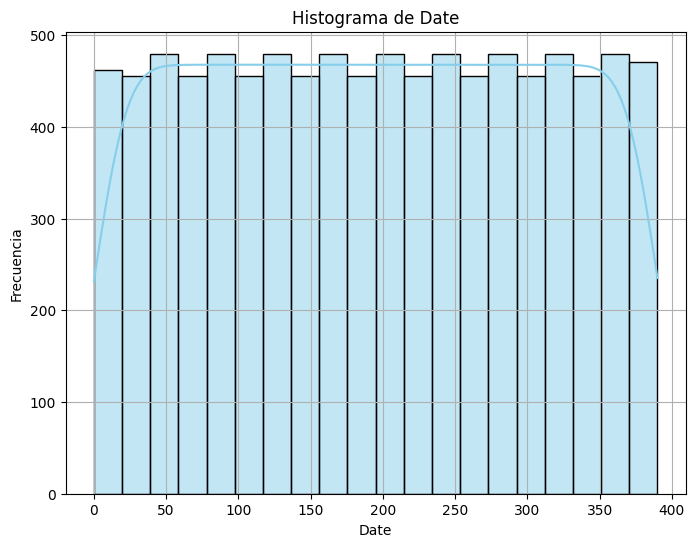

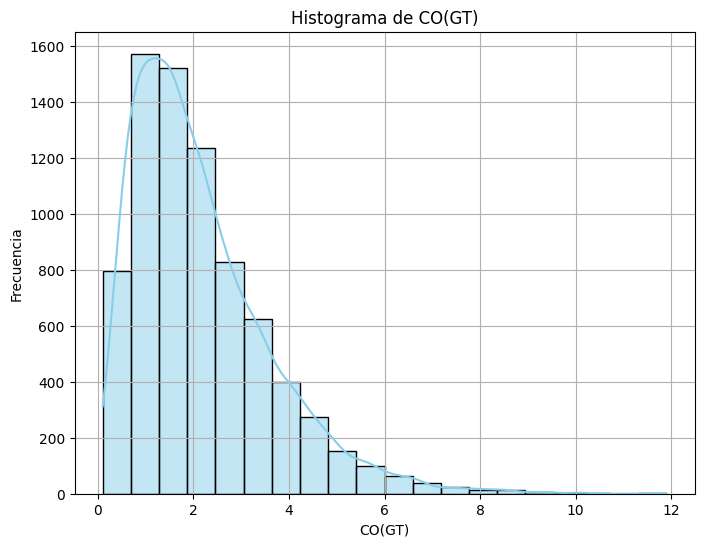

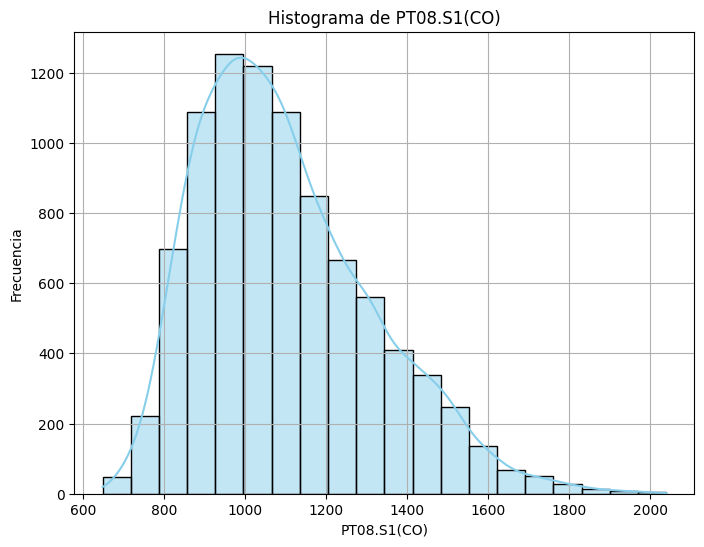

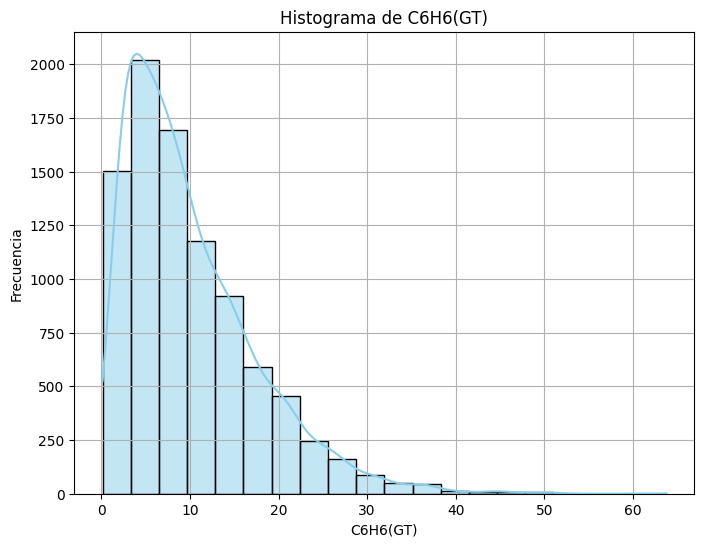

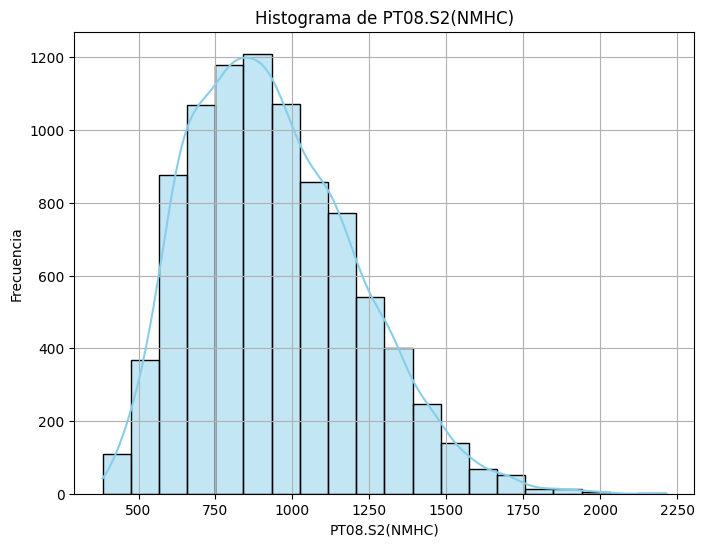

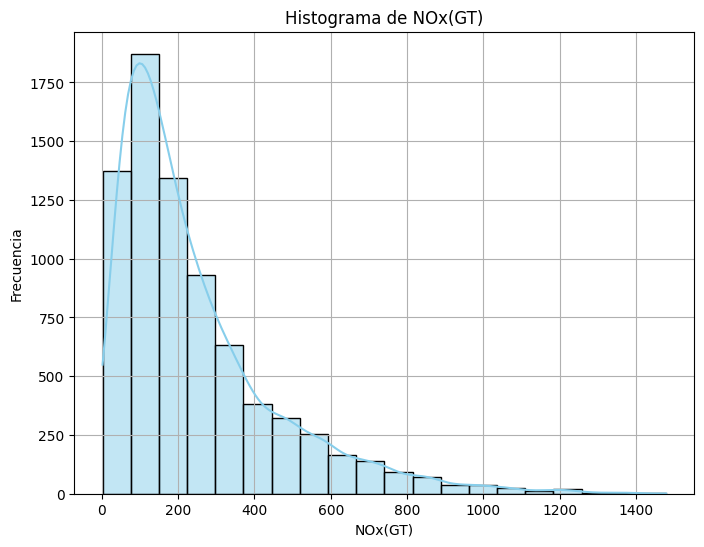

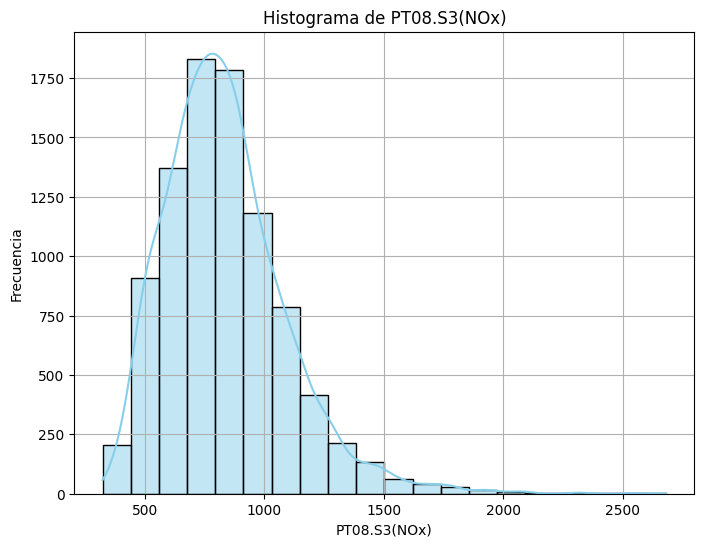

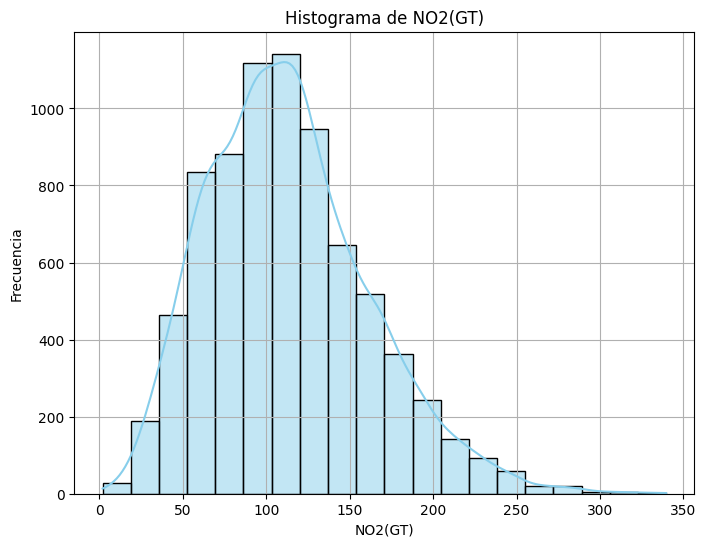

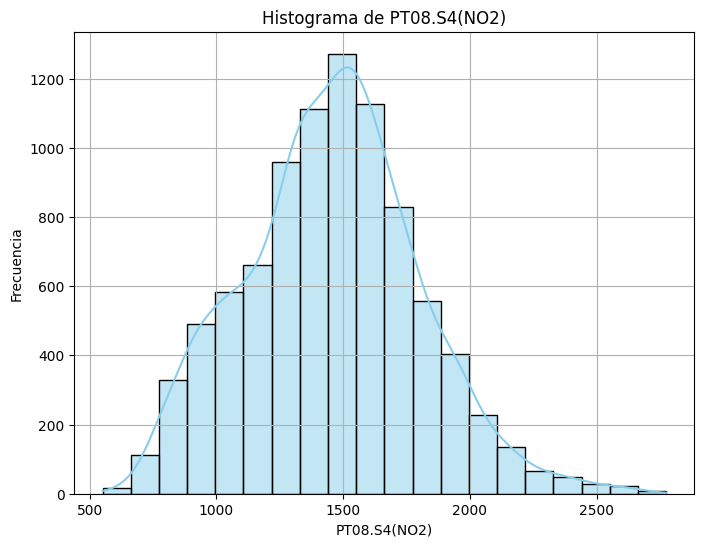

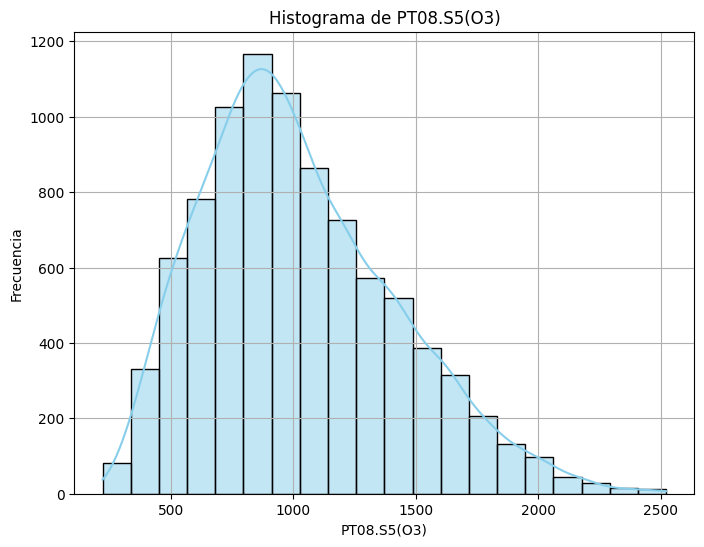

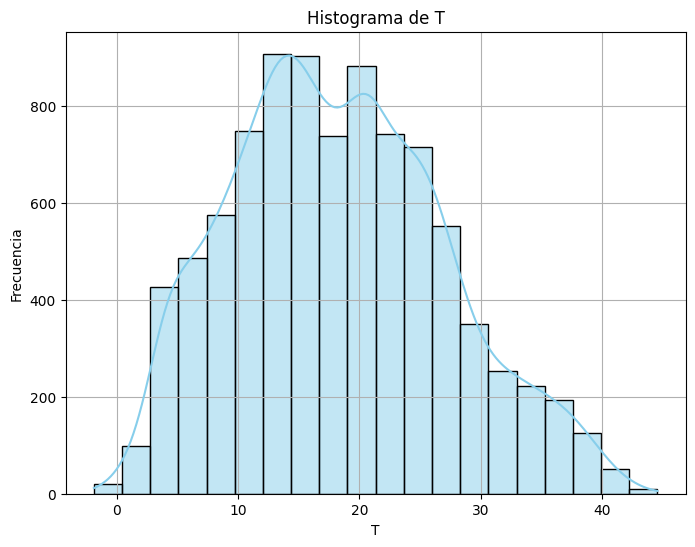

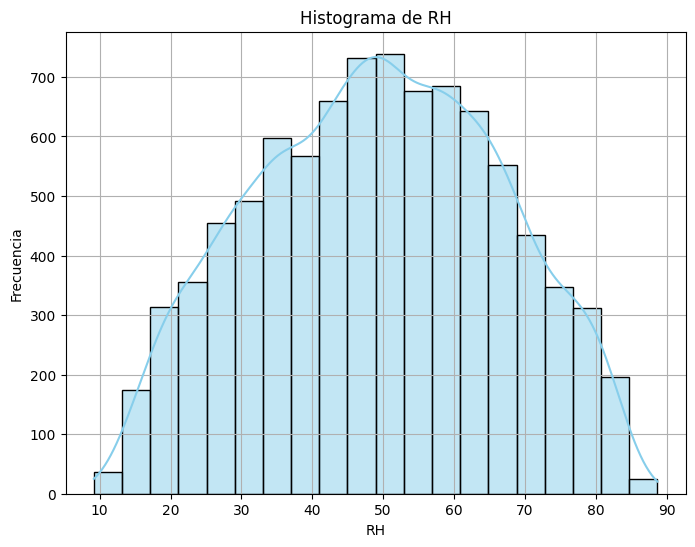

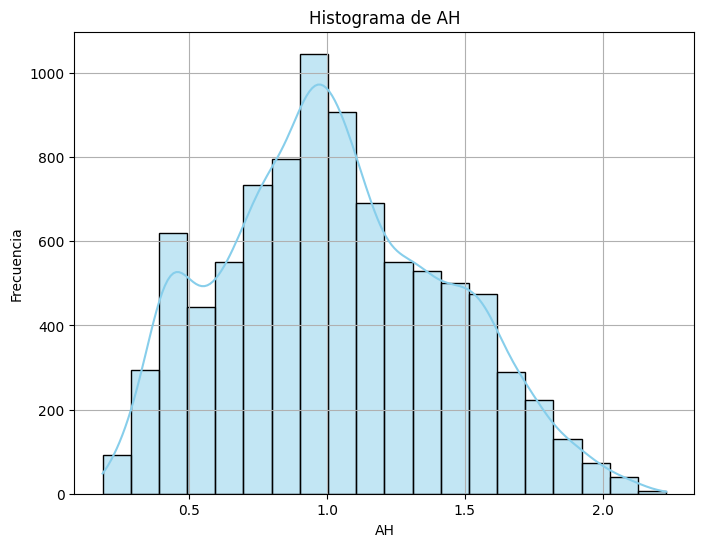

In [14]:

# Seleccionar las columnas para el histograma
columns_for_histogram = df.columns[df.columns != 'Time']

# Crear histogramas para todas las columnas excepto 'Time'
for column in columns_for_histogram:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=20, kde=True, color='skyblue')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()


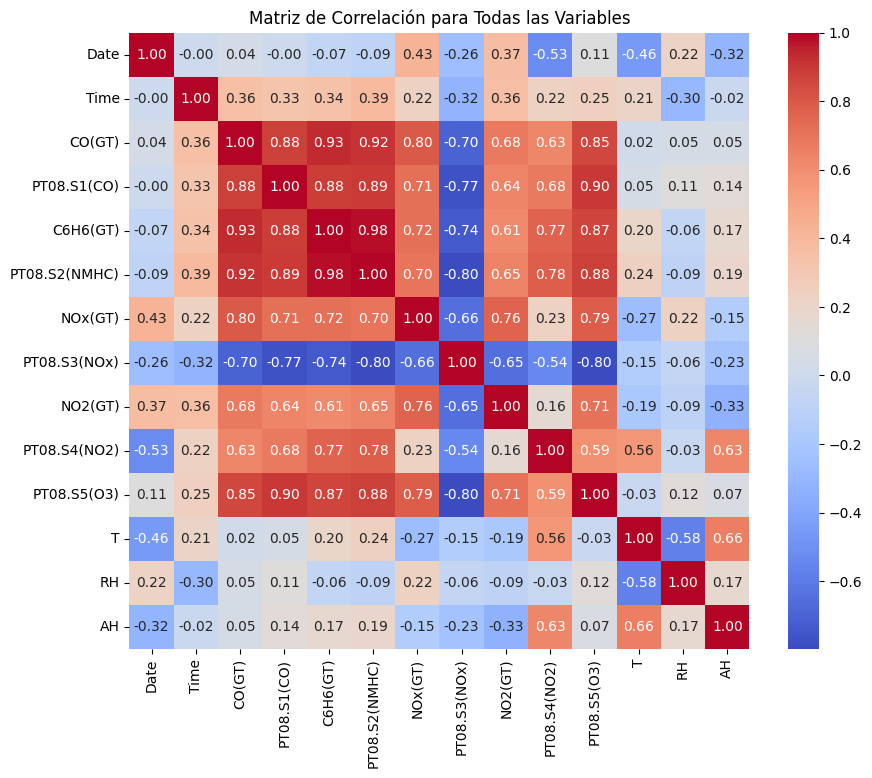

In [15]:
# Exploramos y verificamos el comportamiento lineal entre las variables que muestran una alta correlación

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación para Todas las Variables")
plt.show()

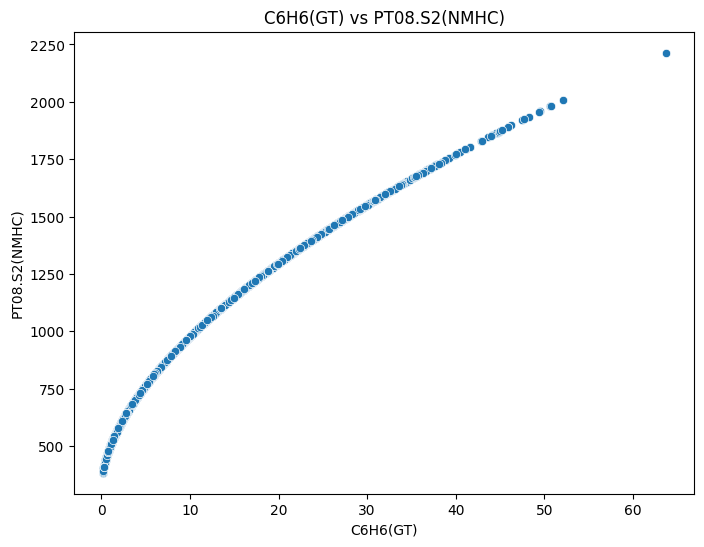

In [16]:
# En base a lo que se puede observar en el mapa de calor anterior se puede concluir que las variables C6H6(GT) y PT08.S2(NMHC)
# están fuertemente relacionadas para comprobarlo mejor a continuacion se creara un diagrama de dispersion y grafica de 
# regresion para observar el comportamiento de esas dos variables.

# Variables que deseas comparar
variable_x = 'C6H6(GT)'
variable_y = 'PT08.S2(NMHC)'

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=variable_x, y=variable_y)
plt.title(f'{variable_x} vs {variable_y}')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.show()


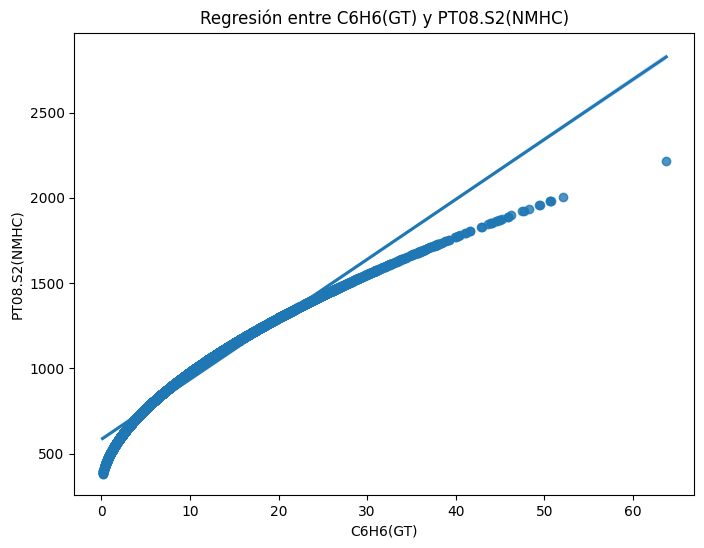

In [17]:
# Variables que deseas comparar
variable_x = 'C6H6(GT)'
variable_y = 'PT08.S2(NMHC)'

# Crear el gráfico de regresión
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x=variable_x, y=variable_y)
plt.title(f'Regresión entre {variable_x} y {variable_y}')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.show()


In [18]:
# Al realizar las graficas anteriores se puede concluir que esas dos variables están fuertemente correlacionadas en ese orden
# de ideas, procedemos a eliminar la que tenga una correlacion mas baja con nuestra variable a predecir que es CO(GT)

# Calcular la matriz de correlación
correlation_matrix = df[['CO(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)']].corr()

# Imprimir la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

# Obtener las correlaciones entre 'CO(GT)' y las otras dos variables
correlation_with_CO_GT = correlation_matrix.loc['CO(GT)', ['C6H6(GT)', 'PT08.S2(NMHC)']]

# Imprimir las correlaciones
print("\nCorrelación con CO(GT):")
print(correlation_with_CO_GT)

Matriz de correlación:
                 CO(GT)  C6H6(GT)  PT08.S2(NMHC)
CO(GT)         1.000000  0.931091       0.915519
C6H6(GT)       0.931091  1.000000       0.981962
PT08.S2(NMHC)  0.915519  0.981962       1.000000

Correlación con CO(GT):
C6H6(GT)         0.931091
PT08.S2(NMHC)    0.915519
Name: CO(GT), dtype: float64


In [19]:
# Tal como se puede observar en la matriz de correlacion anterior la variable que tiene una mayor correlacion con nuestra
# variable a predecir es C6H6(GT), por lo tanto, procedemos a eliminar la variable PT08.S2(NMHC):
# Eliminar la columna "PT08.S2(NMHC)"
df = df.drop(columns=['PT08.S2(NMHC)'])

# Mostrar las primeras filas del DataFrame para verificar que la columna ha sido eliminada
print(df.head())


   Date  Time  CO(GT)  PT08.S1(CO)   C6H6(GT)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  \
0     0    18     2.6      1360.00  11.881723    166.0       1056.25    113.0   
1     0    19     2.0      1292.25   9.397165    103.0       1173.75     92.0   
2     0    20     2.2      1402.00   8.997817    131.0       1140.00    114.0   
3     0    21     2.2      1375.50   9.228796    172.0       1092.00    122.0   
4     0    22     1.6      1272.25   6.518224    131.0       1205.00    116.0   

   PT08.S4(NO2)  PT08.S5(O3)      T         RH        AH  
0       1692.00      1267.50  13.60  48.875001  0.757754  
1       1558.75       972.25  13.30  47.700000  0.725487  
2       1554.50      1074.00  11.90  53.975000  0.750239  
3       1583.75      1203.25  11.00  60.000000  0.786713  
4       1490.00      1110.00  11.15  59.575001  0.788794  


In [20]:
# Seleccionar solo las variables numéricas para la normalización
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Copiar el dataframe para evitar modificar el original
df_normalized = df.copy()

# Normalizar los datos utilizando MinMaxScaler
scaler = MinMaxScaler()
df_normalized[numeric_columns] = scaler.fit_transform(df_normalized[numeric_columns])

# Visualizar los datos normalizados
print("Datos normalizados utilizando MinMaxScaler:")
print(df_normalized.head())

Datos normalizados utilizando MinMaxScaler:
   Date  Time    CO(GT)  PT08.S1(CO)  C6H6(GT)   NOx(GT)  PT08.S3(NOx)  \
0   0.0    18  0.211864     0.511849  0.184498  0.111036      0.311024   
1   0.0    19  0.161017     0.463196  0.145428  0.068382      0.360796   
2   0.0    20  0.177966     0.542011  0.139148  0.087339      0.346500   
3   0.0    21  0.177966     0.522980  0.142780  0.115098      0.326168   
4   0.0    22  0.127119     0.448833  0.100156  0.087339      0.374034   

    NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH        AH  
0  0.328694      0.513040     0.454654  0.333333  0.499057  0.280046  
1  0.266509      0.453125     0.326382  0.326882  0.484287  0.264279  
2  0.331655      0.451214     0.370588  0.296774  0.563168  0.276374  
3  0.355345      0.464366     0.426741  0.277419  0.638906  0.294198  
4  0.337578      0.422212     0.386228  0.280645  0.633564  0.295215  


---
# Aplicamos ML
---

# Paso 1: Preparar los datos
* Dividir los datos en conjuntos de entrenamiento y prueba.

In [53]:
# Dividir los datos en características (X) y objetivo (y)
# Aquí asumimos que 'CO(GT)' es la variable objetivo, ajústalo según tu caso
X = df_imputed.drop(columns=['CO(GT)', 'Date', 'Time'])
y = df_imputed['CO(GT)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Paso 2: Definimos el modelo y los hiperparámetros:
* Se crea una instancia del modelo de regresión lineal.
* Se define una rejilla de parámetros para la búsqueda.

In [54]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Definir una rejilla de parámetros (para regresión lineal hay pocos parámetros, aquí un ejemplo)
param_grid = {
    'fit_intercept': [True, False]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Paso 3: Aplicamos GridSearchCV
* Configuramos GridSearchCV con el modelo, los parámetros y los datos.
* Ejecutamos la búsqueda en cuadrícula.

In [55]:
# Ejecutar la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

# Evaluar el modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calcular métricas de rendimiento (por ejemplo, RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE en el conjunto de prueba:", rmse)

Mejores hiperparámetros encontrados: {'fit_intercept': False}
RMSE en el conjunto de prueba: 0.04058363903360881


# Regresión Lineal:

In [56]:
# Paso 2: Definir y entrenar el modelo de regresión lineal
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train, y_train)

# Paso 3: Evaluar el modelo
y_pred_linear_regression = model_linear_regression.predict(X_test)
rmse_linear_regression = np.sqrt(mean_squared_error(y_test, y_pred_linear_regression))
r2_linear_regression = r2_score(y_test, y_pred_linear_regression)

print("Regresión Lineal:")
print(f"RMSE: {rmse_linear_regression}")
print(f"R^2: {r2_linear_regression}")

Regresión Lineal:
RMSE: 0.04058085250486206
R^2: 0.8906531622682134


# Árboles de Decisión:

In [65]:
from sklearn.tree import DecisionTreeRegressor

# Paso 2: Definir y entrenar el modelo de árbol de decisión
model_decision_tree = DecisionTreeRegressor()
model_decision_tree.fit(X_train, y_train)

# Paso 3: Evaluar el modelo
y_pred_decision_tree = model_decision_tree.predict(X_test)
rmse_decision_tree = np.sqrt(mean_squared_error(y_test, y_pred_decision_tree))
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

print("Árbol de Decisión:")
print(f"RMSE: {rmse_decision_tree}")
print(f"R^2: {r2_decision_tree}")


Árbol de Decisión:
RMSE: 0.051692075276888065
R^2: 0.8225762183747387


# Random Forest:

In [64]:
from sklearn.ensemble import RandomForestRegressor

# Paso 2: Definir y entrenar el modelo de Random Forest
model_random_forest = RandomForestRegressor()
model_random_forest.fit(X_train, y_train)

# Paso 3: Evaluar el modelo
y_pred_random_forest = model_random_forest.predict(X_test)
rmse_random_forest = np.sqrt(mean_squared_error(y_test, y_pred_random_forest))
r2_random_forest = r2_score(y_test, y_pred_random_forest)

print("Random Forest:")
print(f"RMSE: {rmse_random_forest}")
print(f"R^2: {r2_random_forest}")

Random Forest:
RMSE: 0.03518611494492031
R^2: 0.917793429698245


# Redes Neuronales:

In [59]:
from sklearn.neural_network import MLPRegressor

# Paso 2: Definir y entrenar el modelo de redes neuronales
model_neural_network = MLPRegressor(random_state=42)
model_neural_network.fit(X_train, y_train)

# Paso 3: Evaluar el modelo
y_pred_neural_network = model_neural_network.predict(X_test)
rmse_neural_network = np.sqrt(mean_squared_error(y_test, y_pred_neural_network))
r2_neural_network = r2_score(y_test, y_pred_neural_network)

print("Redes Neuronales:")
print(f"RMSE: {rmse_neural_network}")
print(f"R^2: {r2_neural_network}")


Redes Neuronales:
RMSE: 0.03899757632611333
R^2: 0.8990191251498312


# 4. Descripción de los experimentos realizados para ajustar los parámetros cada uno de los métodos 
* Regresión Lineal:
Utilizamos la función GridSearchCV para explorar diferentes combinaciones del parámetro fit_intercept, que determina si se debe calcular o no la intercepción para la regresión lineal.
Ajustamos este parámetro para minimizar el error cuadrático medio en el conjunto de entrenamiento.

* Árboles de Decisión y Random Forest:
Para ambos modelos, ajustamos parámetros como la profundidad máxima del árbol, el número mínimo de muestras requeridas para dividir un nodo y el número mínimo de muestras requeridas en cada hoja.
Utilizamos GridSearchCV para encontrar la combinación óptima de estos parámetros que maximizara el rendimiento del modelo en términos de la métrica de evaluación elegida.

* Redes Neuronales:
Para las redes neuronales, ajustamos parámetros como el número de capas ocultas, el número de neuronas en cada capa, la función de activación y el optimizador.
Nuevamente, utilizamos GridSearchCV para buscar la combinación óptima de estos parámetros que minimizara la función de pérdida en el conjunto de entrenamiento.

* Redes Neuronales Profundas:
Similarmente a las redes neuronales, ajustamos parámetros como el número de capas ocultas, el número de neuronas en cada capa, la función de activación y el optimizador.
Utilizamos GridSearchCV para encontrar la combinación óptima de estos parámetros que minimizara la función de pérdida en el conjunto de entrenamiento.